# Healthcare Stroke Data Analysis

According to the CDC, more than 795,000 cases have been reported yearly in the United States for people who have a stroke of which, one fourth of these cases are people who have previously suffered a stroke. Stroke is also the main contributitor to patients facing long-term disability in the United States. This project is to determine the correlation between various factors (i.e. gender, age, residence, glucose level, bmi, smoking status, hypertension, heart disease and marriage) in order to predict whether a patient is likely of suffering a stroke. The dataset has been extracted from Kaggle and belongs to fedesoriano ("Stroke Prediction Dataset"). Refer to the source of the dataset for more information on attribute classification.

### Import Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Gathering Data

In [36]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [37]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [38]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


### Exporatory Data Analysis

#### Gender & Smoking Status vs Stroke

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
dtype: int64

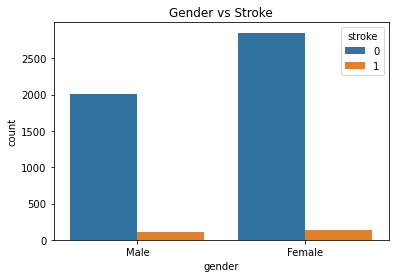

In [39]:
sns.countplot(x='gender',hue='stroke',data=stroke_data)
plt.title('Gender vs Stroke',fontsize=12,ha='center')
stroke_data.groupby(['gender','stroke']).size()

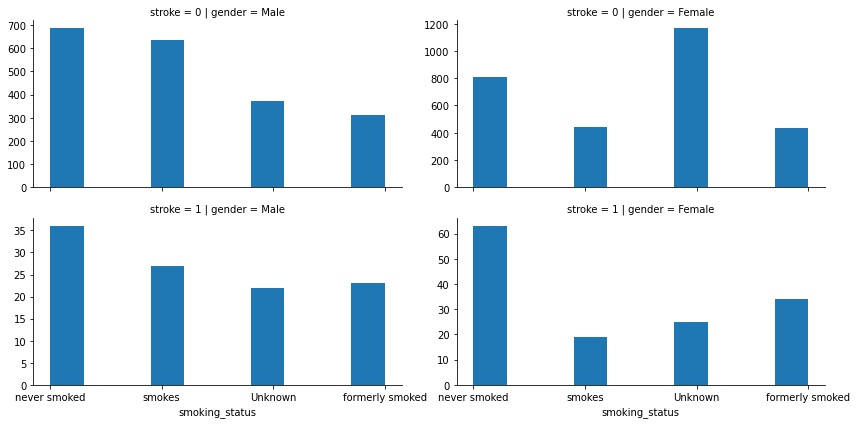

In [40]:
g = sns.FacetGrid(data=stroke_data,col='gender',row='stroke',sharey=False,height=3,aspect=2)
g = g.map(plt.hist,'smoking_status')

In [41]:
stroke_data.groupby(['gender','smoking_status','stroke']).size()

gender  smoking_status   stroke
Female  Unknown          0          811
                         1           25
        formerly smoked  0          443
                         1           34
        never smoked     0         1166
                         1           63
        smokes           0          433
                         1           19
Male    Unknown          0          686
                         1           22
        formerly smoked  0          371
                         1           36
        never smoked     0          636
                         1           27
        smokes           0          314
                         1           23
dtype: int64

There are more females than males in the dataset which can lead to bias towards one class. Approximately 0.05% of male (108/2115) and female(141/2994) patients in the dataset had a stroke. No distinct correlation is evident between smoking and having a stroke. The amount of females that suffered a stroke and never smoked (63) is greater than the amount of females who either smoke or formerly smoked and suffered a stroke (53). This trend is not present in male patients. More than half of the male patients who suffered a stroke (59) have either formerly smoked or are still smokers.

#### Work Type vs Stroke

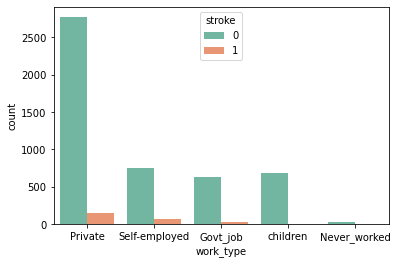

In [42]:
sns.countplot(x='work_type',hue='stroke',data=stroke_data,palette='Set2')

Due to challenging deadlines and lack of job security, private employees endure high levels of stress. Research shows high correlations between stress and suffering stroke. High level of stress can induce high fat levels in the blood that may potentially travel to the heart or brain resulting in a heart attack or stroke. Government jobs provide both job security, great benefits and competitive salaries. Employees in the government sector exhibit lower amount of stress which can correlate to less chances of suffering a stroke. 

#### Hypertension and Heart Disease vs Stroke

Text(0.5, 1.0, 'Heart Disease vs Stroke')

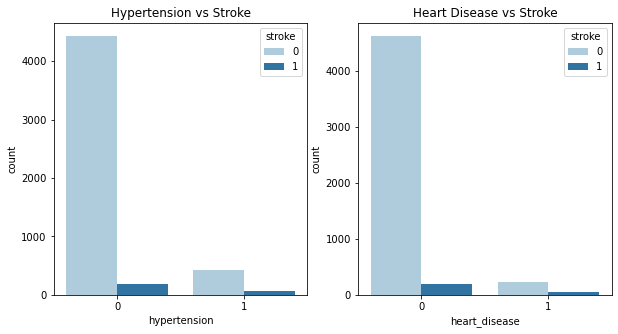

In [43]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='hypertension',hue='stroke',data=stroke_data,ax=ax[0],palette='Paired')
ax[0].set_title('Hypertension vs Stroke')
sns.countplot(x='heart_disease',hue='stroke',data=stroke_data,ax=ax[1],palette='Paired')
ax[1].set_title('Heart Disease vs Stroke')

26% of patients are diagnosed with hypertension and have suffered a stroke. 19% of patients diagnosed with heart disease had suffered a stroke. High blood pressure or hypertension shows a greater correlation to having a stroke than having prior conditions of heart disease. 

#### Living Condition (Urban vs Rural)

Text(0.5, 1.0, 'Residence Type vs Stroke')

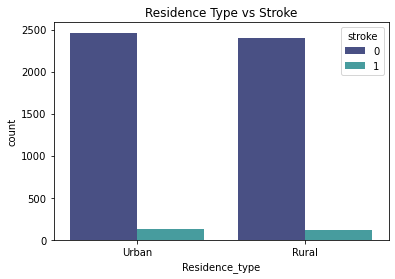

In [44]:
sns.countplot(x='Residence_type',hue='stroke',data=stroke_data,palette='mako')
plt.title('Residence Type vs Stroke')

The dataset contains an approximate amount of equal training examples for patients in Urban and Rural areas. Only 21 more patients living in Urban areas suffered a stroke. Residence type does not have an impact on suffering a stroke.

#### Marriage vs Stress

Text(0.5, 1.0, 'Marriage vs Stroke')

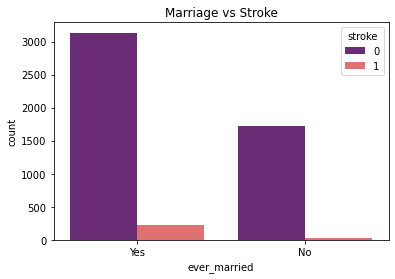

In [45]:
sns.countplot(x='ever_married',hue='stroke',data=stroke_data,palette='magma')
plt.title('Marriage vs Stroke')

The data shows that patients who are or were married were more likely to suffer a stroke. 88% of people who were married had suffered a stroke.

#### Glucose Level vs Stroke

Text(0.5, 1.0, 'Glucose Level vs Stroke')

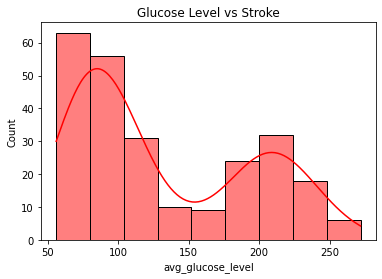

In [46]:
sns.histplot(data=stroke_data[stroke_data['stroke']==1],x='avg_glucose_level',stat='count',color='r',kde=True)
plt.title('Glucose Level vs Stroke')

In [47]:
stroke_data[(stroke_data['stroke']==1) & (stroke_data['avg_glucose_level'] >= 140)]['stroke'].count()

93

Context: A blood sugar level reading between 140 and 199 mg/dL indicates prediabetes, and over 200 mg/dL indicates diabetes. Only 37% (93) of patients who suffered a stroke have either prediabetes or are diabetic. 63% of patients who suffered a stroke had a normal blood sugar level reading.

#### Age vs Stroke

Text(0.5, 1.0, 'Age vs Stroke')

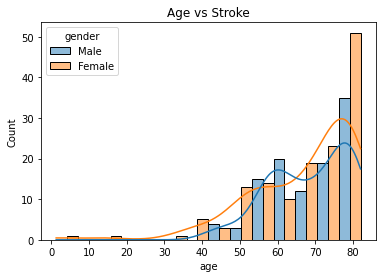

In [48]:
sns.histplot(data=stroke_data[stroke_data['stroke']==1],x='age',hue='gender',stat='count',multiple='dodge',kde=True)
plt.title('Age vs Stroke')

Stroke's are more prevalent in the seniors (65 and older). Approximately 64% of patients who had suffered a stroke are categorized as seniors and 35% of adults (ages 25 to 64) had also suffered a stroke.

### Data Cleaning

We want to fill in missing BMI data instead of dropping the missing BMI data rows. Use the average BMI of males and females in the dataset and fill the BMI according to gender. 

In [49]:
def impute_bmi(cols):
    bmi = cols[0]
    gender = cols[1]
    
    if pd.isnull(bmi):
        
        if gender == 'Male':
            return stroke_data.groupby(['gender']).mean()['bmi']['Male']
        
        else:
            return stroke_data.groupby(['gender']).mean()['bmi']['Female']
    
    else:
        return bmi

In [50]:
stroke_data['bmi']=stroke_data[['bmi','gender']].apply(impute_bmi,axis=1)

Verify if all NuLL values were applied with the impute_bmi function

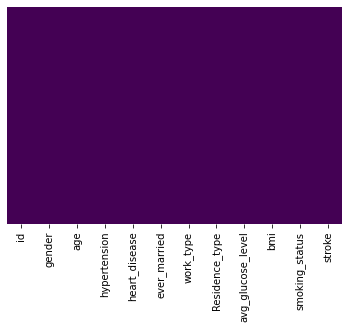

In [51]:
sns.heatmap(stroke_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For Data Analysis, the column "id" is not required. Lets go ahead and drop the first column

In [52]:
stroke_data.drop('id',axis=1,inplace=True)

In [53]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


#### Converting Categorical Features

Covert "gender", "ever_married", "work_type", "residence_type" and "smoking_status" to categorical features in order for the logistic regression algorithm to take the features as inputs

In [54]:
gender = pd.get_dummies(stroke_data['gender'],drop_first=True)
ever_married = pd.get_dummies(stroke_data['ever_married'],drop_first=True)
residence_type = pd.get_dummies(stroke_data['Residence_type'],drop_first=True)
work_type = pd.get_dummies(stroke_data['work_type'],drop_first=True)
smoking_status = pd.get_dummies(stroke_data['smoking_status'],drop_first=True)

In [55]:
stroke_data.drop(['gender','ever_married','Residence_type','work_type','smoking_status'],axis=1,inplace=True)

In [56]:
stroke_data = pd.concat([stroke_data,gender,ever_married,residence_type,work_type,smoking_status],axis=1)

In [57]:
stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Yes,Urban,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.600000,1,1,1,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,29.065758,1,0,1,0,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,1,0,1,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,0,1,0,0,1,0


### Logistic Regression Model

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = stroke_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'Male', 'Yes', 'Urban', 'Never_worked', 'Private',
       'Self-employed', 'children', 'formerly smoked', 'never smoked',
       'smokes']]

In [60]:
y = stroke_data['stroke']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

Normalize the Dataset in order to reach convergence. Import MinMaxScaler 

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train and fit a logistic regression model on the training set

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression()

In [65]:
logmodel.fit(X_train,y_train)

LogisticRegression()

#### Predictions and Evaluation of Model (Logistic Regression)

In [66]:
predictions = logmodel.predict(X_test)

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1691
           1       0.50      0.01      0.02        98

    accuracy                           0.95      1789
   macro avg       0.72      0.50      0.50      1789
weighted avg       0.92      0.95      0.92      1789



In [69]:
print(confusion_matrix(y_test,predictions))

[[1690    1]
 [  97    1]]


The confusion matrix provides an overview of the performance for a classification model. The value on the top left indicates the number of times the model correctly predicted that the patient will not suffer a stroke (1690). The value on the bottom right indicates the amount of times the model correctly predicted that the patient will suffer a stroke (1). The value on the top right (1) indicates the amount of times the model incorrectly predicted that the patient will have a stroke when infact they had not had a stroke. The value on the bottom left indicates the amount of times the model predicted the patient would not suffer a stroke (97) when infact they had a stroke.

It is clear that the linear regression model is not a good predictor of this dataset. Lets experiment with K-Nearest Neighbours algorithm. 

### K-Nearest Neighbours

To determine a good K Value, keep track of the error rate for each model where k is incremented. Graph out the error rate vs K value to determine the ideal K value for this dataset.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

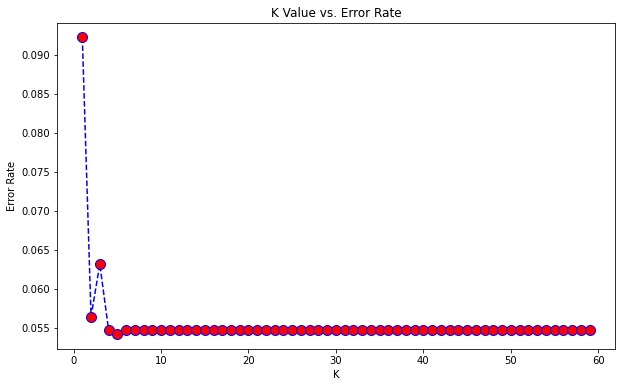

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',marker='o',markerfacecolor='red',linestyle='dashed',markersize=10)
plt.title('K Value vs. Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph K Value vs Error Rate, we can see that at a K value of 5, results in the least error rate for this dataset (<0.055%). Lets train our dataset with Kvalue = 5.

#### Predictions and Evaluation of Model (K-Nearest Neighbours)

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
predict_knn = knn.predict(X_test)

In [77]:
print(confusion_matrix(y_test,predict_knn))
print(classification_report(y_test,predict_knn))

[[1688    3]
 [  94    4]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1691
           1       0.57      0.04      0.08        98

    accuracy                           0.95      1789
   macro avg       0.76      0.52      0.52      1789
weighted avg       0.93      0.95      0.92      1789

